In [1]:
import numpy as np
import pandas as pd
import re
import sys, os
import glob
import gc
import itertools
import zipfile

from tqdm import tqdm
import shutil

from pathlib import Path

here_path = Path().resolve()
repo_path = here_path.parents[2]
sys.path.append(str(repo_path))

#module_path = os.path.abspath(os.path.join('../../'))
#if module_path not in sys.path:
#    sys.path.append(module_path)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from py.utils import verifyDir
from py.datasets.dataprocess.comparisons import QScores

In [4]:
geo_level="All"

In [5]:
DATA_PATH = f"{repo_path}/data/pp2/"
CSV_PATH=f"{DATA_PATH}raw/"
PP_IMAGES_PATH=f"{DATA_PATH}images/"

PROCESSED_PATH=f"{DATA_PATH}processed/"
QSCORE_PATH=f"{PROCESSED_PATH}Qscores/"
GEO_LEVEL_PATH=f"{QSCORE_PATH}{geo_level}/"
RESULTS_PATH=f"{GEO_LEVEL_PATH}Scores/"
IMAGES_PATH=f"{GEO_LEVEL_PATH}Images/"
PROCESSED_IMAGES_PATH=f"{PROCESSED_PATH}images/"

N_JOBS=8

In [6]:
verifyDir(QSCORE_PATH)
verifyDir(RESULTS_PATH)
verifyDir(IMAGES_PATH)
verifyDir(PROCESSED_IMAGES_PATH)

In [7]:
%%time
pp2_comparisons_df = pd.read_csv(zipfile.ZipFile(f"{PROCESSED_PATH}HumanEvaluations.zip").open("HumanEvaluations/comparisons.csv"), sep=";", low_memory=False)
pp2_comparisons_df

CPU times: user 7.88 s, sys: 554 ms, total: 8.44 s
Wall time: 8.43 s


,vote_id,left_id,right_id,winner,category,voter_uniqueid,left_lat,left_long,left_city,left_country,left_continent,left_image_path,right_lat,right_long,right_city,right_country,right_continent,right_image_path,sorted_pair,user_id
0,5815426b02a8dc05afdf2b74,50e5f7d4d7c3df413b00056a,50f42c0dfdc9f065f00017bc,left,safety,8f5fe1b8602349f7bdf8a27e5ae75a48,22.310524,114.170637,Hong Kong,China,Asia,Hong Kong/50e5f7d4d7c3df413b00056a.JPG,52.302266,20.989567,Warsaw,Poland,Europe,Warsaw/50f42c0dfdc9f065f00017bc.JPG,"('50e5f7d4d7c3df413b00056a', '50f42c0dfdc9f065...",user_0
1,51f2e453ad93a763cc1d2e9c,50e5f7d4d7c3df413b00056a,50f562ddfdc9f065f0005af3,right,safety,3a666b3c1ca84ccfa0cdd3c7423228f2,22.310524,114.170637,Hong Kong,China,Asia,Hong Kong/50e5f7d4d7c3df413b00056a.JPG,1.285515,103.810072,Singapore,Singapore,Asia,Singapore/50f562ddfdc9f065f0005af3.JPG,"('50e5f7d4d7c3df413b00056a', '50f562ddfdc9f065...",user_1
2,546fd72802a8dc4bc0758a3b,50e5f7d4d7c3df413b00056a,50f5eb24fdc9f065f000804a,right,safety,b544eec9acb74a2f8a7f464560fe6242,22.310524,114.170637,Hong Kong,China,Asia,Hong Kong/50e5f7d4d7c3df413b00056a.JPG,-22.807149,-43.413760,Rio De Janeiro,Brasil,South America,Rio De Janeiro/50f5eb24fdc9f065f000804a.JPG,"('50e5f7d4d7c3df413b00056a', '50f5eb24fdc9f065...",user_2
3,537e474402a8dc0677005191,50e5f7d4d7c3df413b00056a,50f5eb4afdc9f065f00081bb,equal,beautiful,2035397a7a80404ab026246c9e42d991,22.310524,114.170637,Hong Kong,China,Asia,Hong Kong/50e5f7d4d7c3df413b00056a.JPG,-22.805310,-43.427501,Rio De Janeiro,Brasil,South America,Rio De Janeiro/50f5eb4afdc9f065f00081bb.JPG,"('50e5f7d4d7c3df413b00056a', '50f5eb4afdc9f065...",user_3
4,523376dead93a760f8daa56b,50e5f7d4d7c3df413b00056a,513cbda1fdc9f035870010d9,left,safety,42e405acdb5f439a94f37df2121f0b1a,22.310524,114.170637,Hong Kong,China,Asia,Hong Kong/50e5f7d4d7c3df413b00056a.JPG,29.838246,-95.312139,Houston,USA,North America,Houston/513cbda1fdc9f035870010d9.JPG,"('50e5f7d4d7c3df413b00056a', '513cbda1fdc9f035...",user_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555543,51f80ed7ad93a780c8788fc6,5185cd21fdc9f03fd5000cdf,513e6465fdc9f0358700b812,left,wealthy,eb9cb07d831a4888898ee8eb8649b52f,45.479466,-73.662663,Montreal,Canada,North America,Montreal/5185d53bfdc9f03fd5001493.JPG,35.058854,135.756810,Kyoto,Japan,Asia,Kyoto/513e6465fdc9f0358700b812.JPG,"('513e6465fdc9f0358700b812', '5185cd21fdc9f03f...",user_3390
1555544,592c770302a8dc05afdfa4f3,5185cd21fdc9f03fd5000cdf,513e6c96fdc9f0358700c1ac,left,safety,479c83d12ecd4c2db4cc46c56bc353b3,45.479466,-73.662663,Montreal,Canada,North America,Montreal/5185d53bfdc9f03fd5001493.JPG,35.594405,139.765548,Tokyo,Japan,Asia,Tokyo/513e6c96fdc9f0358700c1ac.JPG,"('513e6c96fdc9f0358700c1ac', '5185cd21fdc9f03f...",user_94573
1555545,543e49d002a8dc4bbe75863a,5185cd21fdc9f03fd5000cdf,51408cabfdc9f0358700eb8a,right,lively,cf6fd73f3bab40c597ad5d57f24ea025,45.479466,-73.662663,Montreal,Canada,North America,Montreal/5185d53bfdc9f03fd5001493.JPG,38.760147,-9.105329,Lisbon,Portugal,Europe,Lisbon/51408cabfdc9f0358700eb8a.JPG,"('51408cabfdc9f0358700eb8a', '5185cd21fdc9f03f...",user_4313
1555546,586ba57302a8dc05afdf5c3b,5185cd21fdc9f03fd5000cdf,51409d77fdc9f049260012ff,left,safety,8459e27a9f104cf19d84a3d1bb9d8971,45.479466,-73.662663,Montreal,Canada,North America,Montreal/5185d53bfdc9f03fd5001493.JPG,41.913943,12.425267,Rome,Italy,Europe,Rome/51409d77fdc9f049260012ff.JPG,"('51409d77fdc9f049260012ff', '5185cd21fdc9f03f...",user_28625


### Initialize Q-Score calculator

In [8]:
pp = QScores(pp2_comparisons_df, place_level=geo_level)

In [9]:
metrics = pp.get_metrics()
metrics

array(['safety', 'beautiful', 'wealthy', 'lively', 'boring', 'depressing'],
      dtype=object)

In [10]:
# city_comparisons_df.loc[("North America", slice(None), slice(None), "Atlanta")]

#### Calculating Q-Score per image

Time: aprox 48 min

In [11]:
%%time
images_metric = {"metrics":[], "values":[]}
summary_df = pd.DataFrame()
for metric in metrics:
    verifyDir(f"{RESULTS_PATH}{metric}/")
    
    if Path(f"{RESULTS_PATH}{metric}/matches.csv").exists():
        df_ = pd.read_csv(f"{RESULTS_PATH}{metric}/matches.csv", sep=";", low_memory=False)
    else:
        pp.calculate_q_scores(metric=metric)
        df_ = pp.get_q_scores()
        df_.to_csv(f"{RESULTS_PATH}{metric}/matches.csv", sep=";", index=False)
        print(f"Saving {metric} in {RESULTS_PATH}{metric}/matches.csv")
        
    images_metric["metrics"].append(metric)
    images_metric["values"].append(df_.shape[0])

    if len(summary_df)==0:
        summary_df = df_[["image_id", "lat", "long", "city", "country", "continent", "Qscore"]].copy()
    else:
        summ_ = df_[["image_id", "lat", "long", "city", "country", "continent", "Qscore"]].copy()
        summary_df = pd.merge(summary_df, summ_, how="outer", on=["image_id", "lat", "long", "city", "country", "continent"])
    summary_df.rename(columns={"Qscore": metric}, inplace=True)
    
summary_df.fillna(0., inplace=True)

CPU times: user 1.93 s, sys: 181 ms, total: 2.11 s
Wall time: 2.11 s


#### Adding image paths

In [12]:
base_path = Path(PP_IMAGES_PATH)
img_path_list = np.sort([str(p.relative_to(base_path)) for p in base_path.glob('*/*.JPG')])
image_path_dict = {path.split("/")[-1].replace(".JPG",""): path for path in img_path_list}

In [13]:
%%time
summary_df["image_path"] = summary_df["image_id"].map(image_path_dict)
summary_df = summary_df[~summary_df["image_path"].isna()].copy()
summary_df

CPU times: user 34.2 ms, sys: 4 ms, total: 38.2 ms
Wall time: 37.3 ms


,image_id,lat,long,city,country,continent,safety,beautiful,wealthy,lively,boring,depressing,image_path
0,50e5f7d4d7c3df413b00056a,22.310524,114.170637,Hong Kong,China,Asia,4.135536,1.574074,2.962963,4.199346,5.000000,0.000000,Hong Kong/50e5f7d4d7c3df413b00056a.JPG
1,50e5f7d4d7c3df413b00056b,22.274799,114.192828,Hong Kong,China,Asia,3.560981,2.229437,5.277778,5.662393,7.777778,3.333333,Hong Kong/50e5f7d4d7c3df413b00056b.JPG
2,50e5f7d4d7c3df413b00056c,22.291117,114.147373,Hong Kong,China,Asia,4.514946,3.333333,3.333333,4.746693,3.611111,0.000000,Hong Kong/50e5f7d4d7c3df413b00056c.JPG
3,50e5f7d4d7c3df413b00056d,22.314273,114.177176,Hong Kong,China,Asia,4.852448,3.333333,5.083333,3.333333,8.333333,3.327381,Hong Kong/50e5f7d4d7c3df413b00056d.JPG
4,50e5f7d4d7c3df413b00056e,22.332412,114.204790,Hong Kong,China,Asia,4.975207,2.129630,3.680556,4.343857,2.500000,4.444444,Hong Kong/50e5f7d4d7c3df413b00056e.JPG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108815,5185d533fdc9f03fd500148d,45.635489,-73.514755,Montreal,Canada,North America,6.111111,5.833333,2.333333,3.495058,3.333333,9.166667,Montreal/5185d533fdc9f03fd500148d.JPG
108816,5185d533fdc9f03fd500148e,45.581265,-73.511511,Montreal,Canada,North America,4.797811,3.251984,2.777778,2.148291,7.222222,7.777778,Montreal/5185d533fdc9f03fd500148e.JPG
108817,5185d534fdc9f03fd500148f,45.591299,-73.520681,Montreal,Canada,North America,5.006830,6.888889,7.777778,6.176471,5.833333,2.611111,Montreal/5185d534fdc9f03fd500148f.JPG
108818,5185d534fdc9f03fd5001490,45.470656,-73.631901,Montreal,Canada,North America,4.551622,3.333333,5.000000,5.008547,3.611111,2.962963,Montreal/5185d534fdc9f03fd5001490.JPG


In [14]:
# summary_df[summary_df["image_id"].isin(["50f5eb5ffdc9f065f00081fc", "50f5ead5fdc9f065f0007dc1"])]

In [15]:
summary_df.to_csv(f"{RESULTS_PATH}scores.csv", sep=";", index=False)

#### Aggregate information

In [16]:
aggregate_mean_df = pd.pivot_table(summary_df,
                      index=["city", "country", "continent"],
                      values=["image_id", "safety", "beautiful", "wealthy", "lively", "boring", "depressing"],
                      aggfunc = {
                          "image_id": len,
                          "safety": "mean",
                          "beautiful": "mean",
                          "wealthy": "mean",
                          "lively": "mean",
                          "boring": "mean",
                          "depressing": "mean",
                      }).rename(columns={"image_id": "num_images"}).reset_index().set_index(["city", "country", "continent", "num_images"])
aggregate_mean_df.columns = [ f"{c}_mean" for c in aggregate_mean_df.columns ]

aggregate_std_df = pd.pivot_table(summary_df,
                      index=["city", "country", "continent"],
                      values=["image_id", "safety", "beautiful", "wealthy", "lively", "boring", "depressing"],
                      aggfunc = {
                          "image_id": len,
                          "safety": "std",
                          "beautiful": "std",
                          "wealthy": "std",
                          "lively": "std",
                          "boring": "std",
                          "depressing": "std",
                      }).rename(columns={"image_id": "num_images"}).reset_index().set_index(["city", "country", "continent", "num_images"])
aggregate_std_df.columns = [ f"{c}_std" for c in aggregate_std_df.columns ]

aggregate_df = pd.merge(aggregate_mean_df, aggregate_std_df, on=["city", "country", "continent", "num_images"])
aggregate_df.reset_index(inplace=True)

new_columns = ["city", "country", "continent", "num_images"]
for metric in metrics:
    new_columns.append(f"{metric}_mean")
    new_columns.append(f"{metric}_std")

aggregate_df = aggregate_df[new_columns].copy()
aggregate_df.to_csv(f"{RESULTS_PATH}aggregate_statistics.csv", sep=";", index=False)

### Statistics

#### Correlation matrix

In [17]:
# df = data_df[data_df["city"]=="Hong Kong"].copy()
# df = data_df[data_df["city"]=="Mexico City"].copy()
# df = data_df[data_df["city"]=="Gaborone"].copy()
# df = data_df[data_df["city"]=="Helsinki"].copy()

In [18]:
correlation_matrix = summary_df.loc[:, ["safety", "beautiful", "wealthy", "lively", "boring", "depressing"]].corr()
correlation_matrix

,safety,beautiful,wealthy,lively,boring,depressing
safety,1.000000,0.211484,0.201239,0.173714,-0.081153,-0.149016
beautiful,0.211484,1.000000,0.181221,0.129531,-0.076937,-0.157848
wealthy,0.201239,0.181221,1.000000,0.151903,-0.070815,-0.131113
lively,0.173714,0.129531,0.151903,1.000000,-0.100792,-0.107941
boring,-0.081153,-0.076937,-0.070815,-0.100792,1.000000,0.060564
depressing,-0.149016,-0.157848,-0.131113,-0.107941,0.060564,1.000000


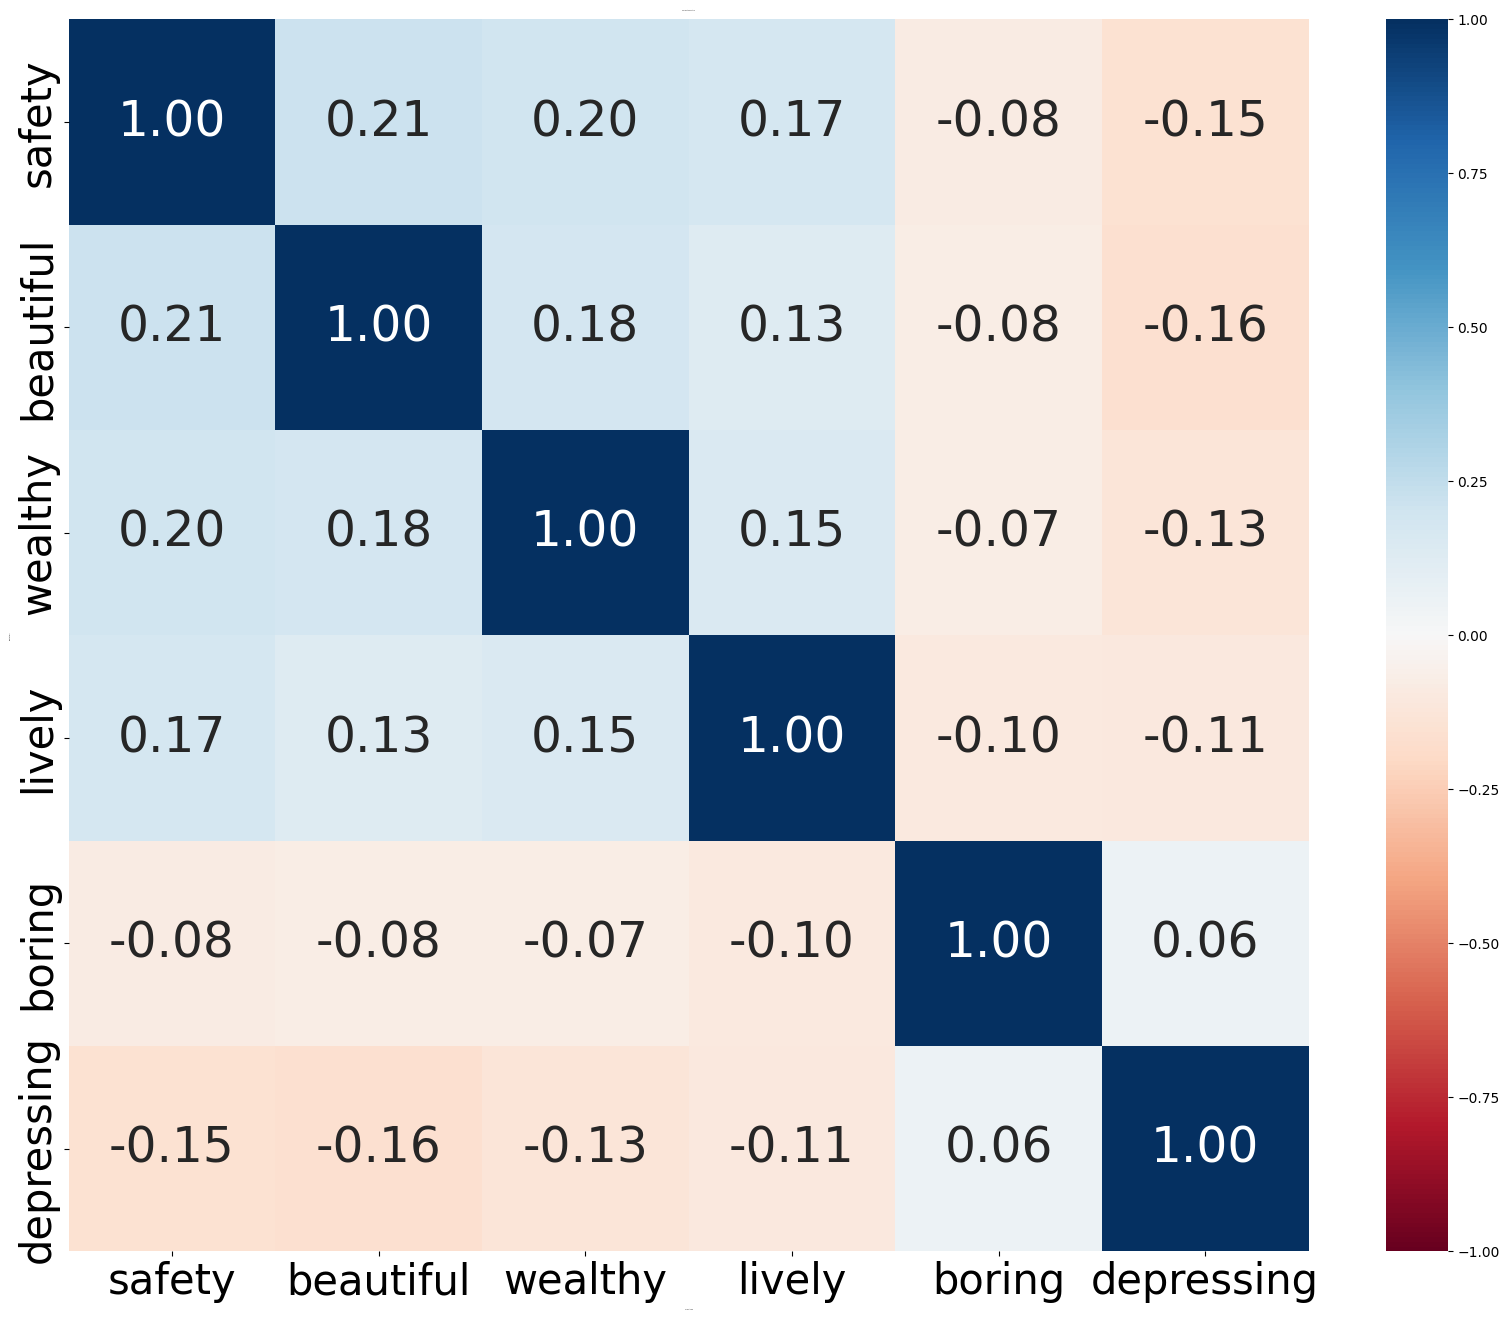

In [19]:
# confusion_matrix = pd.crosstab(data_df['annotations'], data_df['crimetype'], rownames=['annotations'], colnames=['crimetype'])

cmap=sns.diverging_palette(130, 700, s=100, as_cmap=True)
cmap="RdBu"

plt.figure(figsize=(20, 16))
sns_heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=cmap, center=0, vmin=-1, vmax=1, cbar=True, annot_kws={"size": 35})

# Customize the plot
sns_heatmap.set_title('Correlation Matrix', fontsize=0)
sns_heatmap.set_xlabel('Crime type', fontsize=0, rotation=0)
sns_heatmap.set_ylabel('Annotations', fontsize=0)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Display the plot
plt.show()

##### Score histogram per category

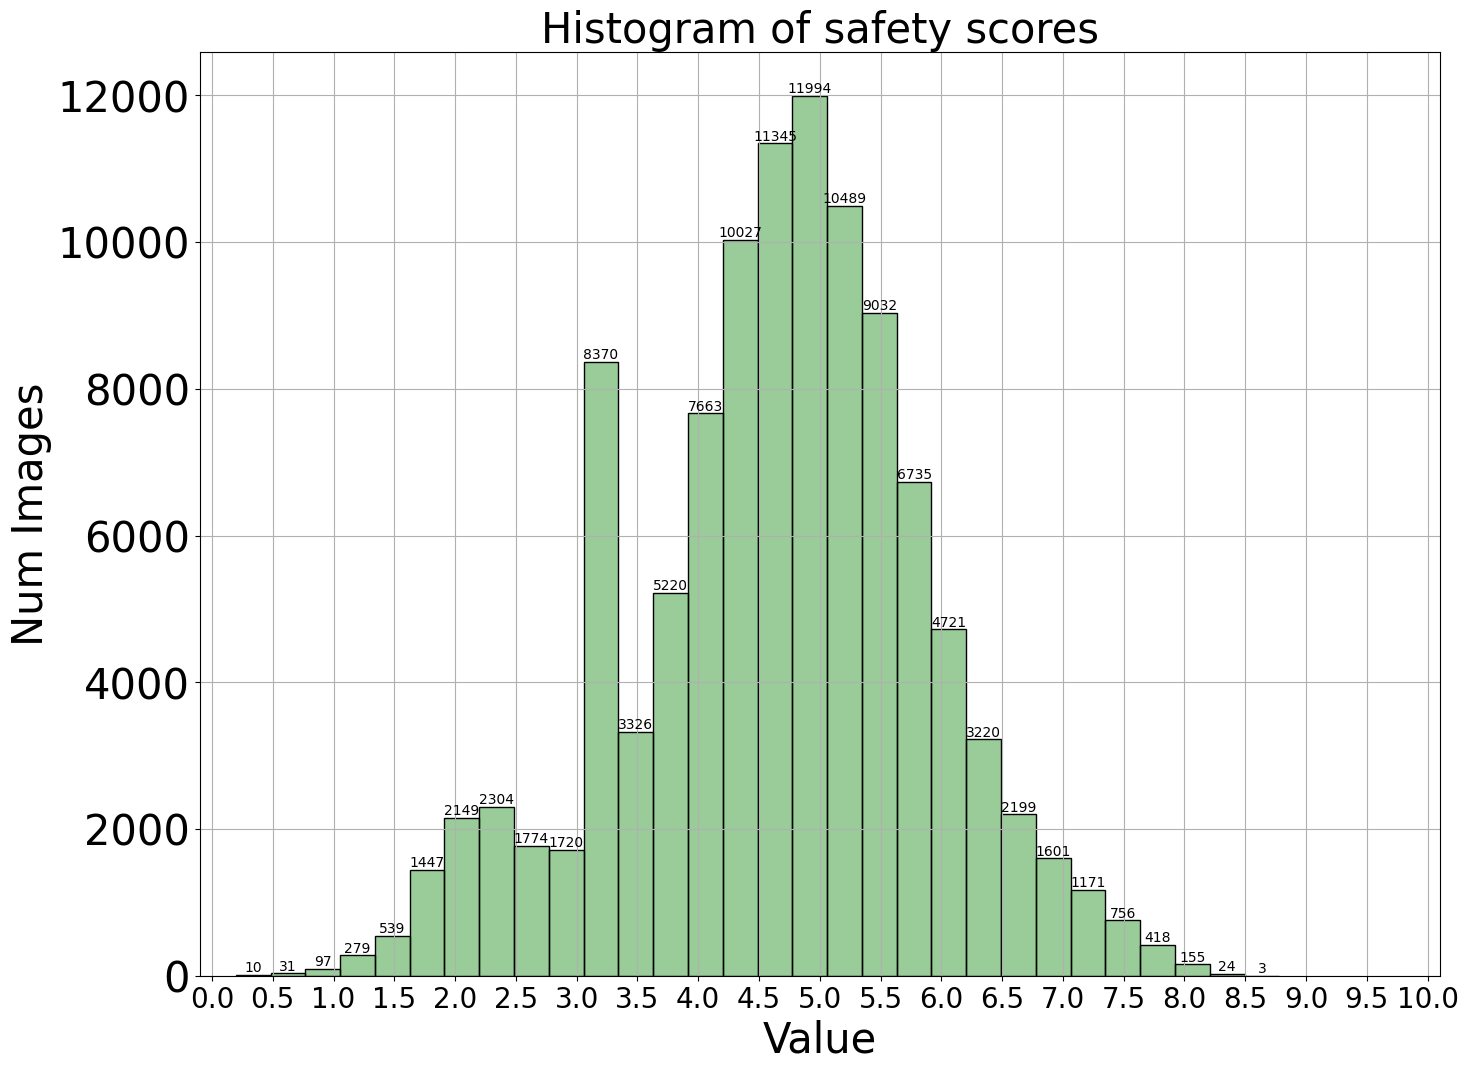

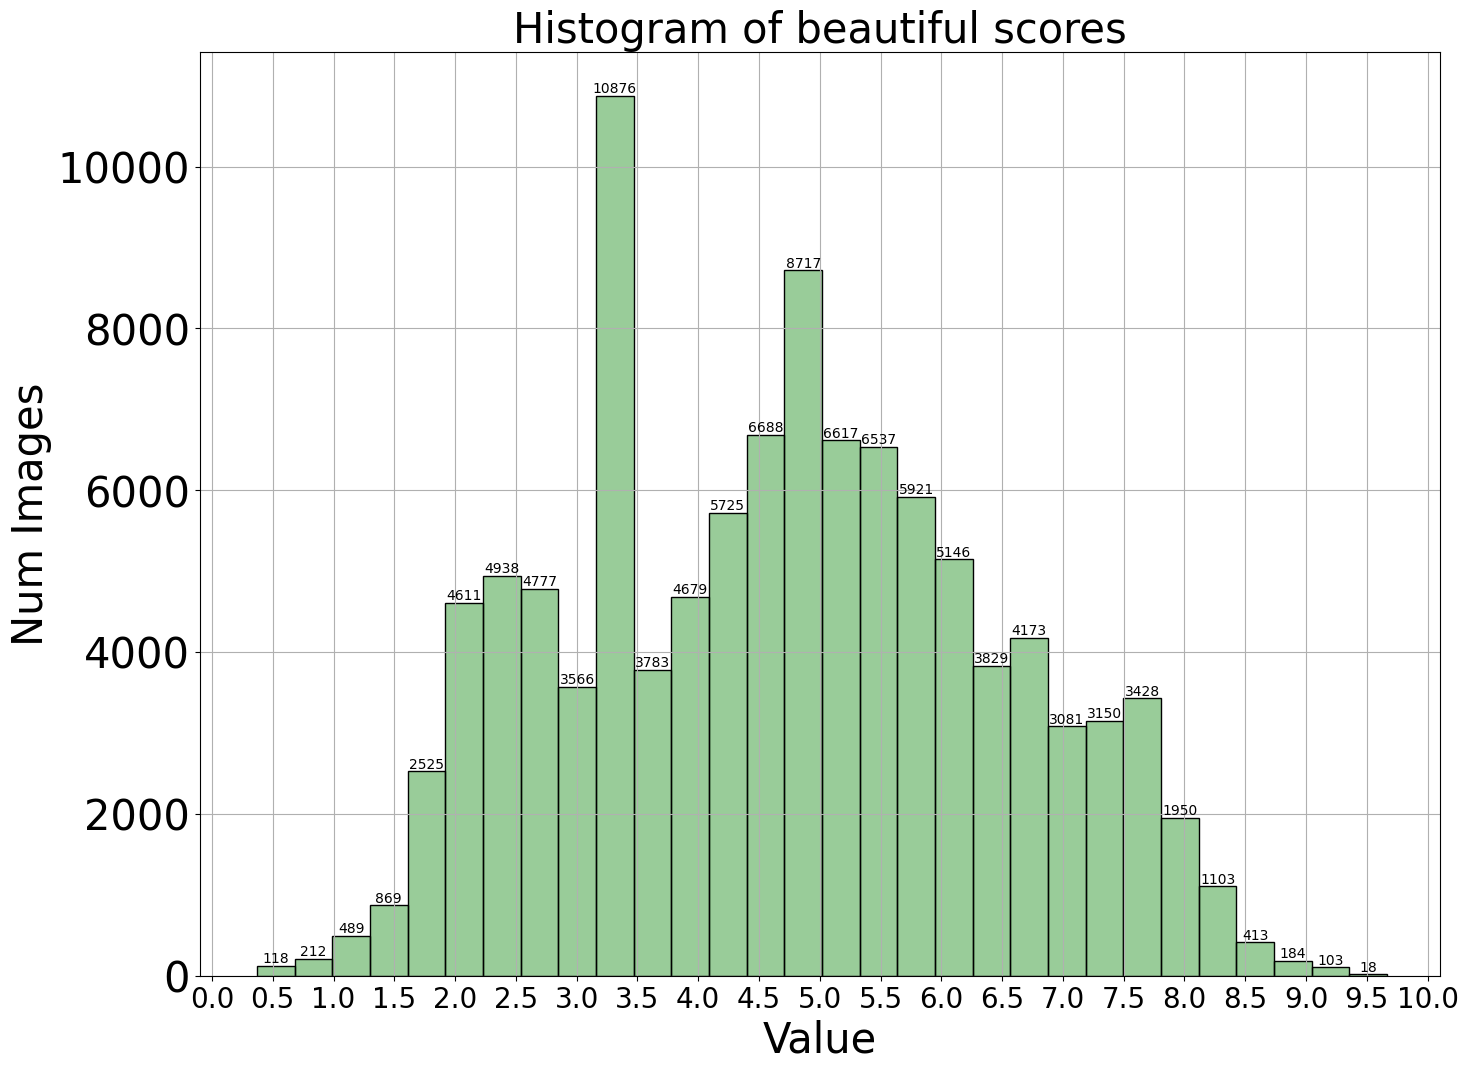

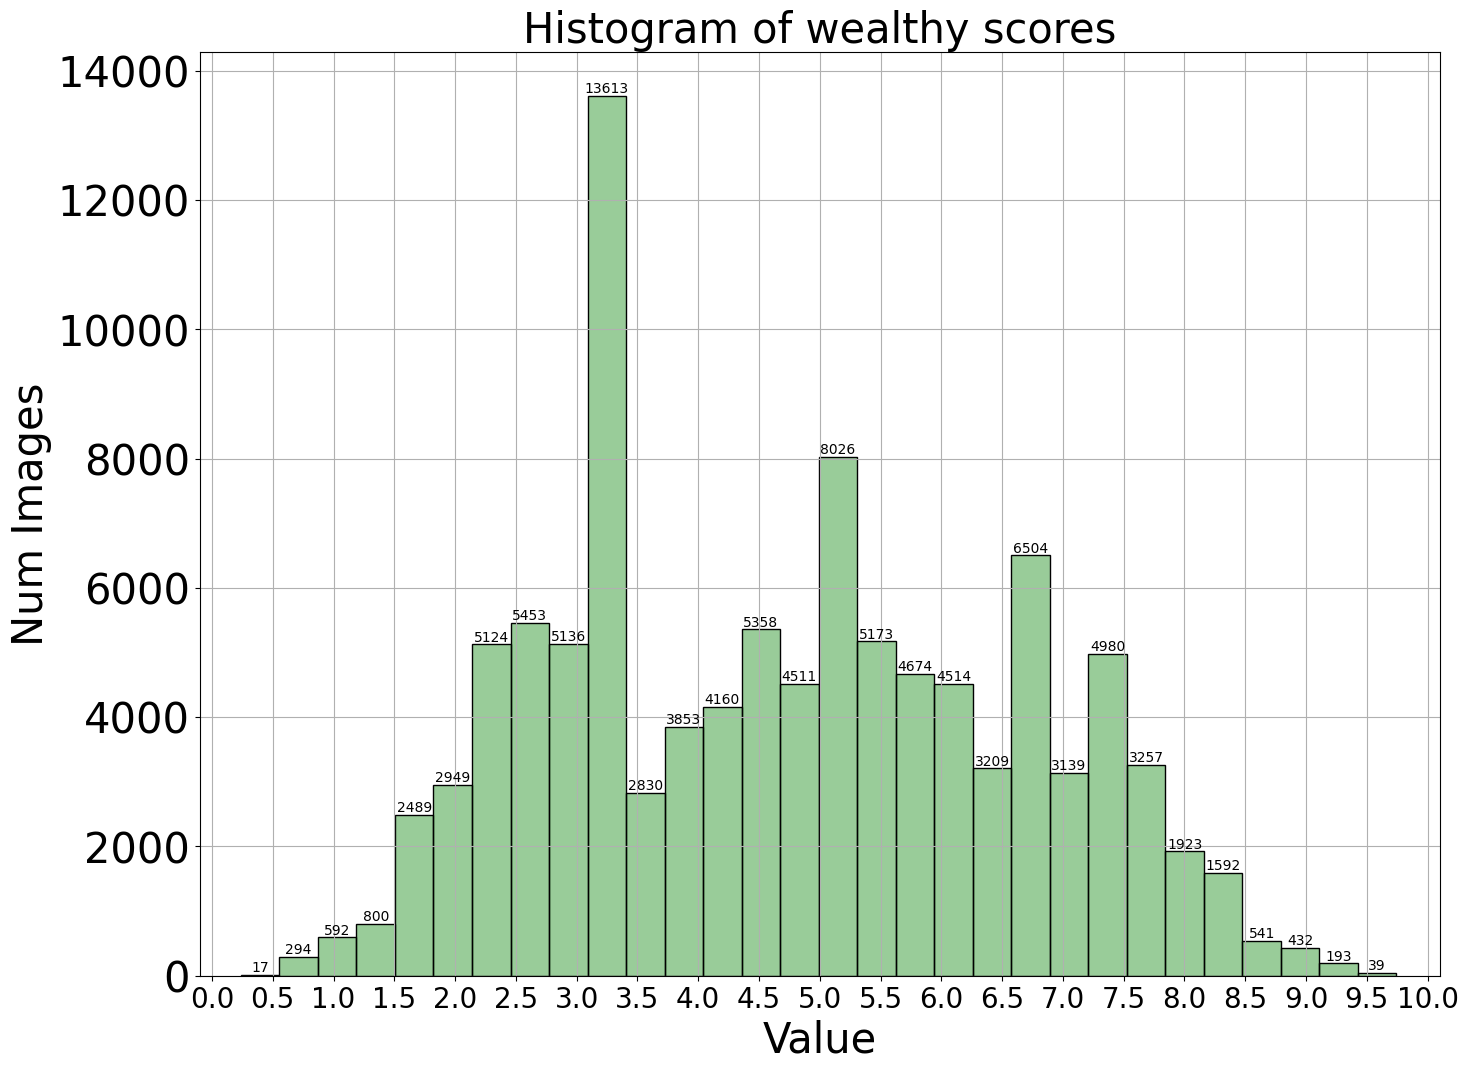

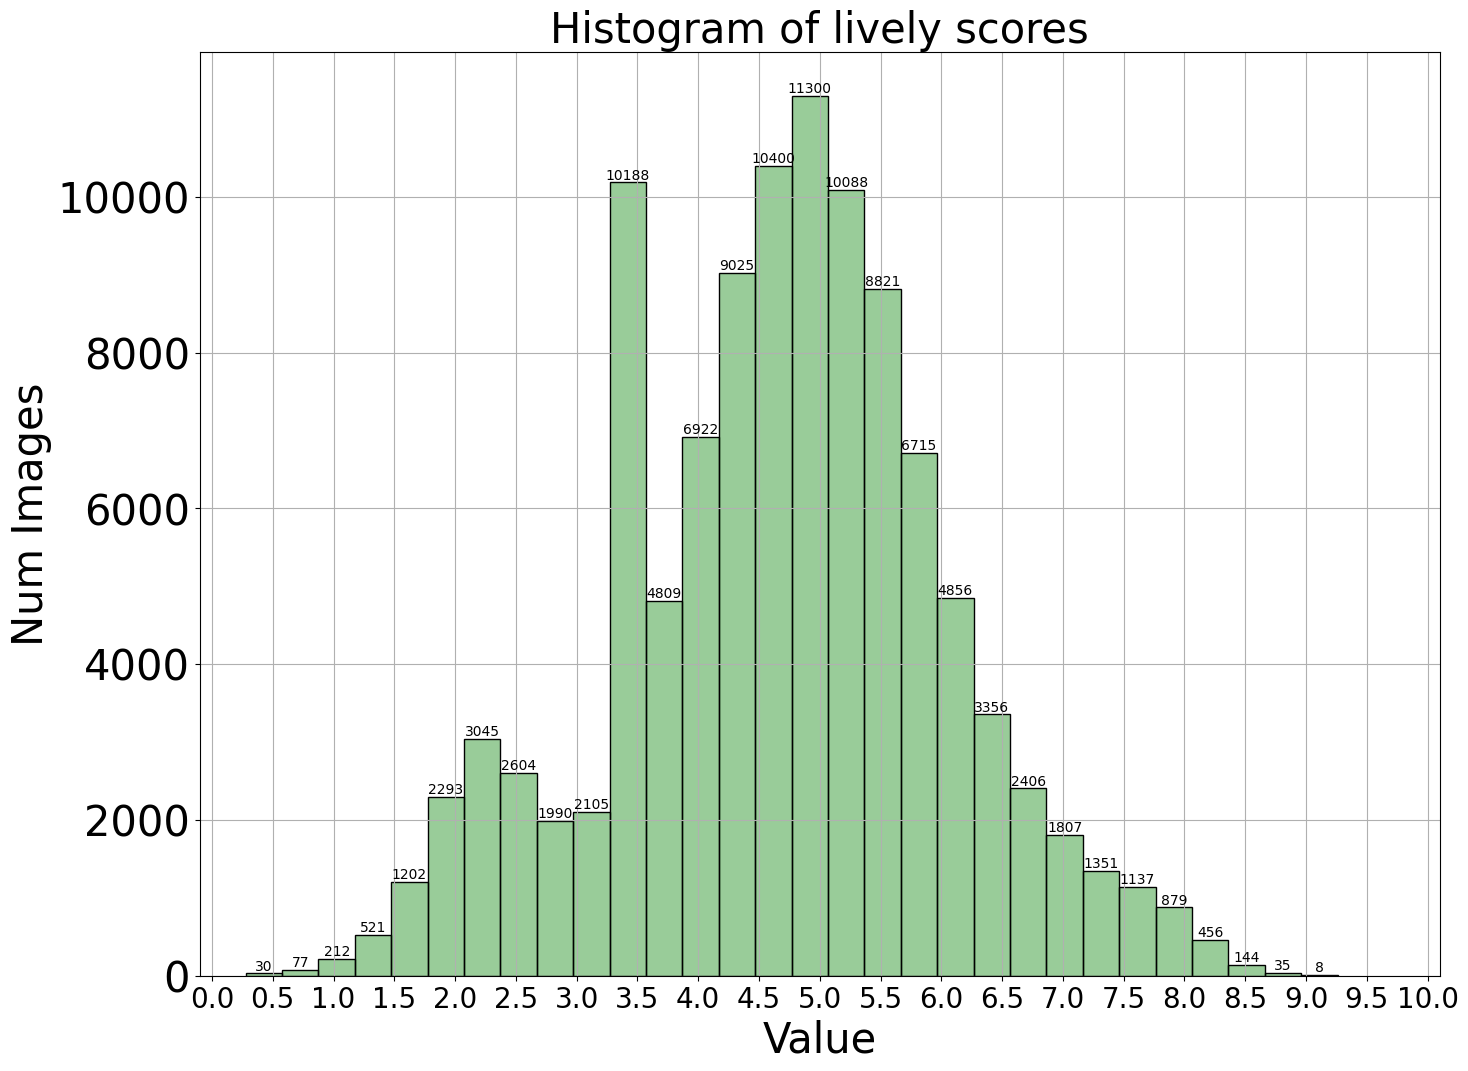

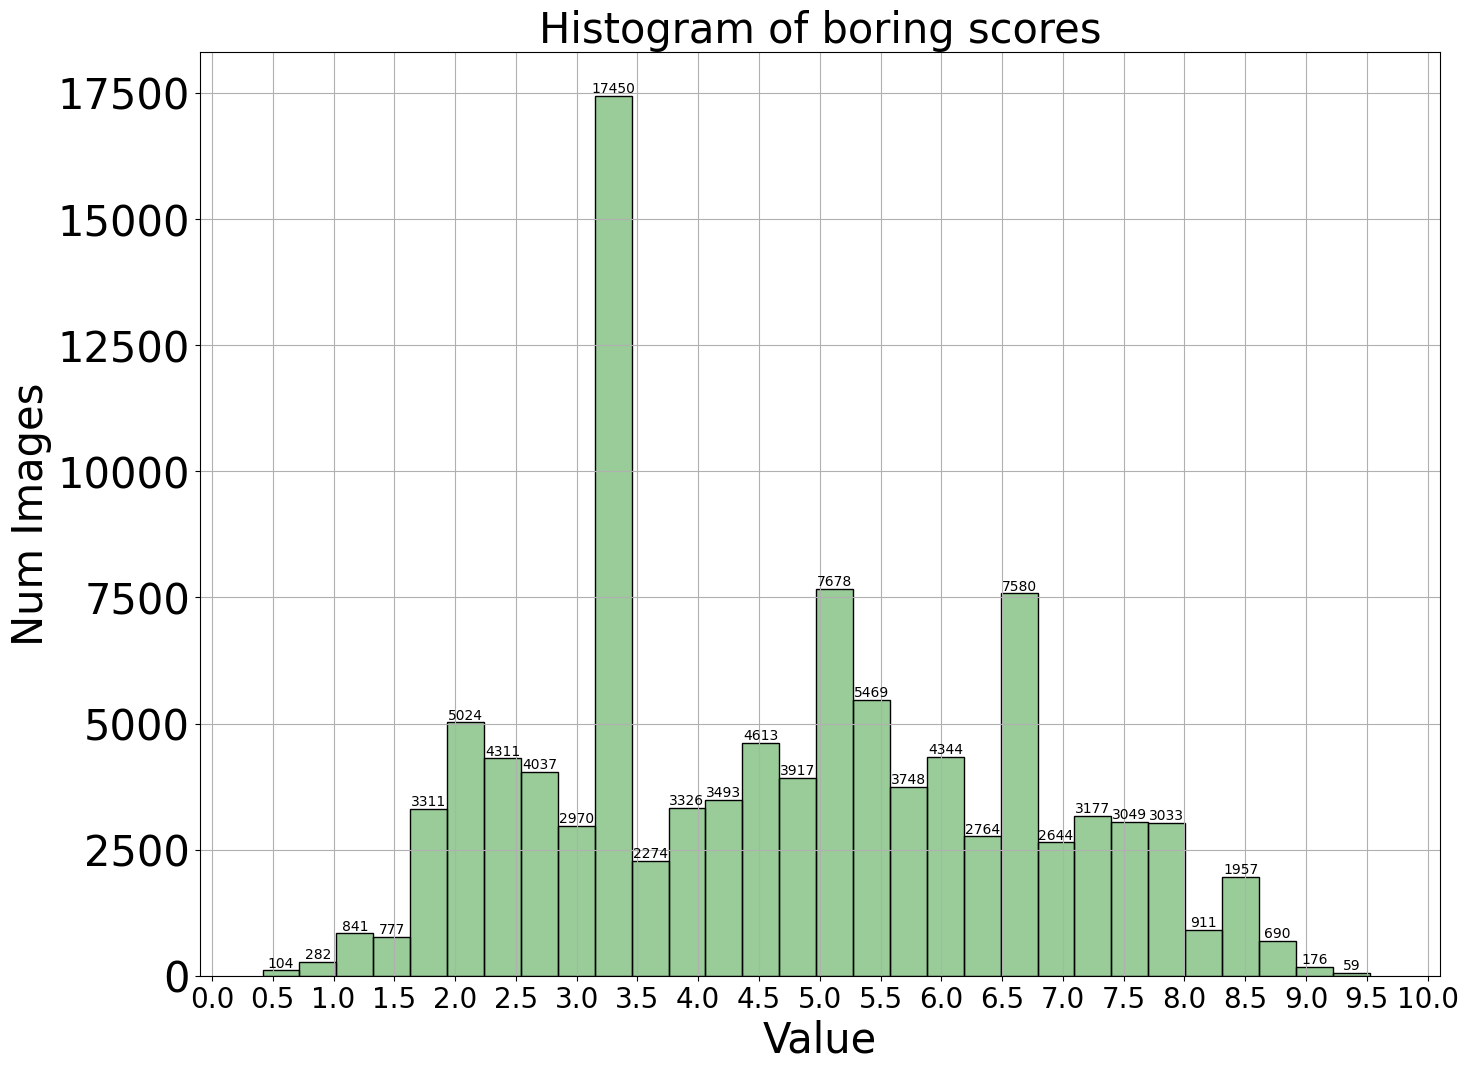

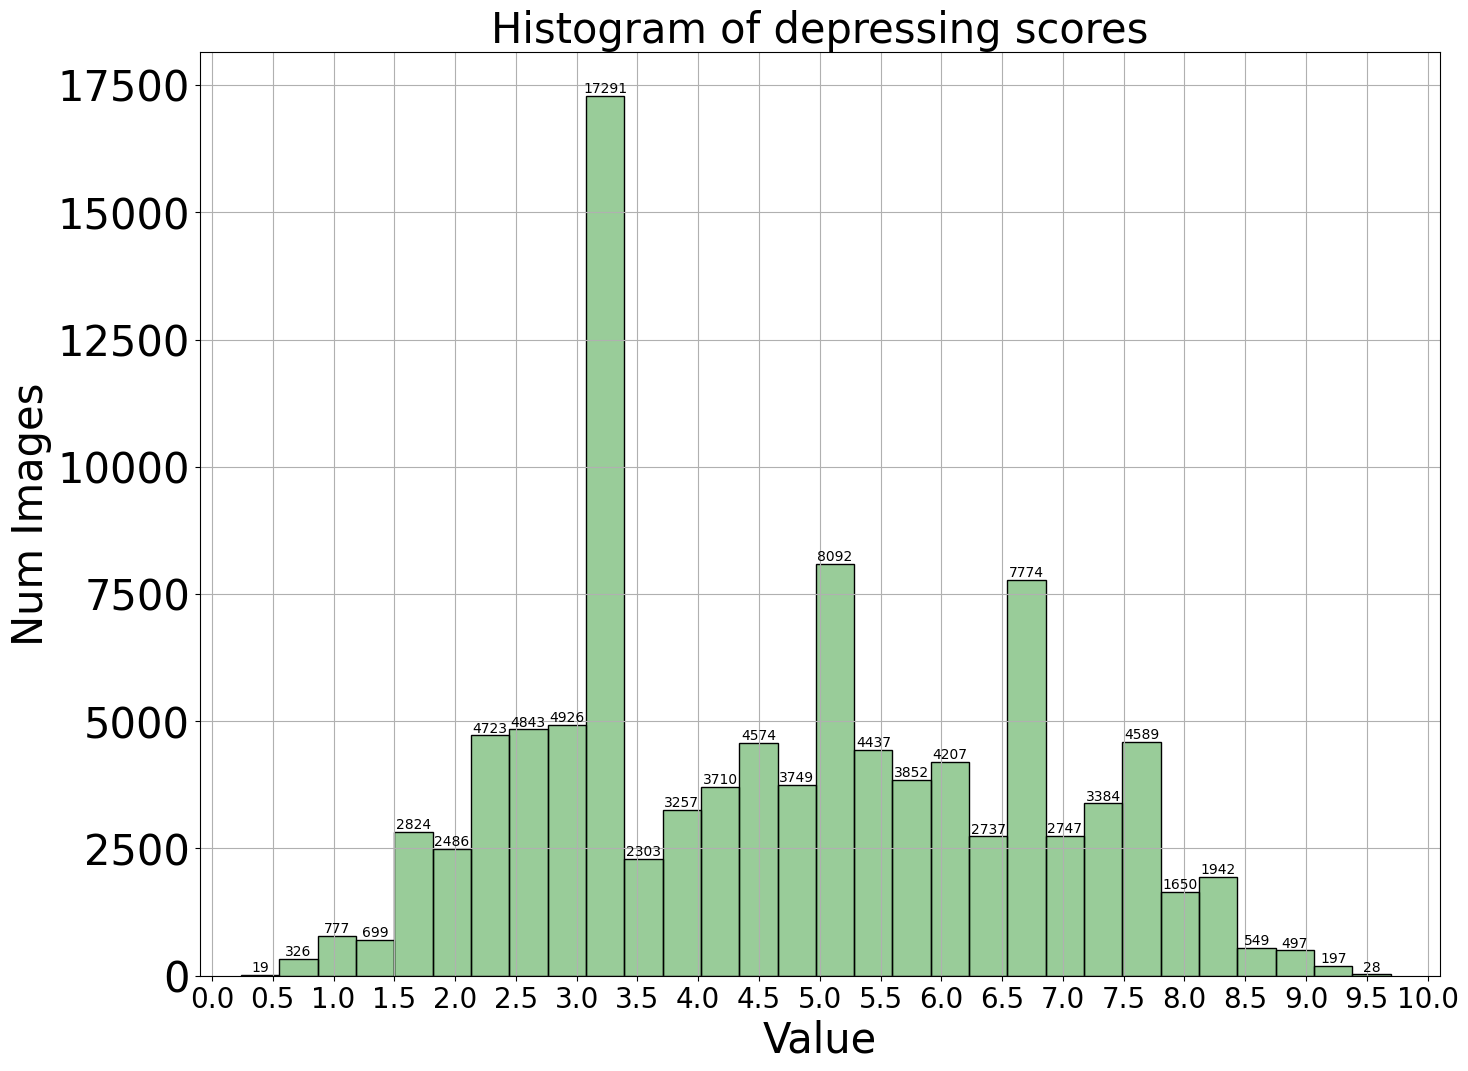

In [20]:
for metric in metrics:
    verifyDir(f"{IMAGES_PATH}{metric}/")

    scores_df = pd.read_csv(f"{RESULTS_PATH}{metric}/matches.csv", sep=";", low_memory=False)
    scores = scores_df["Qscore"].values
    
    fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)

    sns_fig = sns.histplot(scores, 
                             bins=30, 
                             color='g', 
                             kde=False, 
                             label='City', 
                             ax=ax,
                             alpha=0.4)

    sns_fig.set_title(f"Histogram of {metric} scores", fontsize=30)
    sns_fig.set_ylabel('Num Images', fontsize=30)
    sns_fig.set_xlabel('Value', fontsize=30)

    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='y', labelsize=30)

    # add annotation
    _ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

    # add a space on y for the annotations
    #sns_fig.margins(x=0.1)
    ax.grid(True)

    # plt.xlim(-0.1, 10.1)
    # plt.xticks(np.arange(0.0, 10.1, 0.5))

    # ax.legend(fontsize=40)
    # a,b = ax.get_xlim()
    xticks = np.arange(0.0, 10.1, 0.5)  # Adjust the range and step as needed
    sns_fig.set_xticks(xticks)
    ax.set_xlim(-0.1, 10.1)

    # # Display the plot
    # plt.legend()

    fig.savefig(f'{IMAGES_PATH}/{metric}/score_histogram.png')
    plt.show()

##### Score histogram per category and cities

In [21]:
for metric in metrics:
    verifyDir(f"{IMAGES_PATH}{metric}/cities/")
    verifyDir(f"{RESULTS_PATH}{metric}/cities/")
    
    scores_df = pd.read_csv(f"{RESULTS_PATH}{metric}/matches.csv", sep=";", low_memory=False)
    
    for current_city in scores_df["city"].unique().tolist():
        city_df = scores_df[scores_df["city"]==current_city].copy()
        city_df.to_csv(f"{RESULTS_PATH}/{metric}/cities/{current_city}.csv", sep=";", index=False)
        
        scores = city_df["Qscore"].values
        
        fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)

        sns_fig = sns.histplot(scores, 
                                 bins=30, 
                                 color='g', 
                                 kde=False, 
                                 label='City', 
                                 ax=ax,
                                 alpha=0.4)

        sns_fig.set_title(f"Histogram of {metric} scores in {current_city}", fontsize=30)
        sns_fig.set_ylabel('Num Images', fontsize=20)
        sns_fig.set_xlabel('Value', fontsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='y', labelsize=20)

        # add annotation
        _ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

        # add a space on y for the annotations
        #sns_fig.margins(x=0.1)
        ax.grid(True)

        # plt.xlim(-0.1, 10.1)
        # plt.xticks(np.arange(0.0, 10.1, 0.5))

        # ax.legend(fontsize=40)
        # a,b = ax.get_xlim()
        xticks = np.arange(0.0, 10.1, 0.5)  # Adjust the range and step as needed
        sns_fig.set_xticks(xticks)
        ax.set_xlim(-0.1, 10.1)

        # # Display the plot
        # plt.legend()

        fig.savefig(f'{IMAGES_PATH}/{metric}/cities/{current_city}_score_histogram.png')
        plt.close(fig)
#         plt.show()


##### Number of image comparisons frequency per category

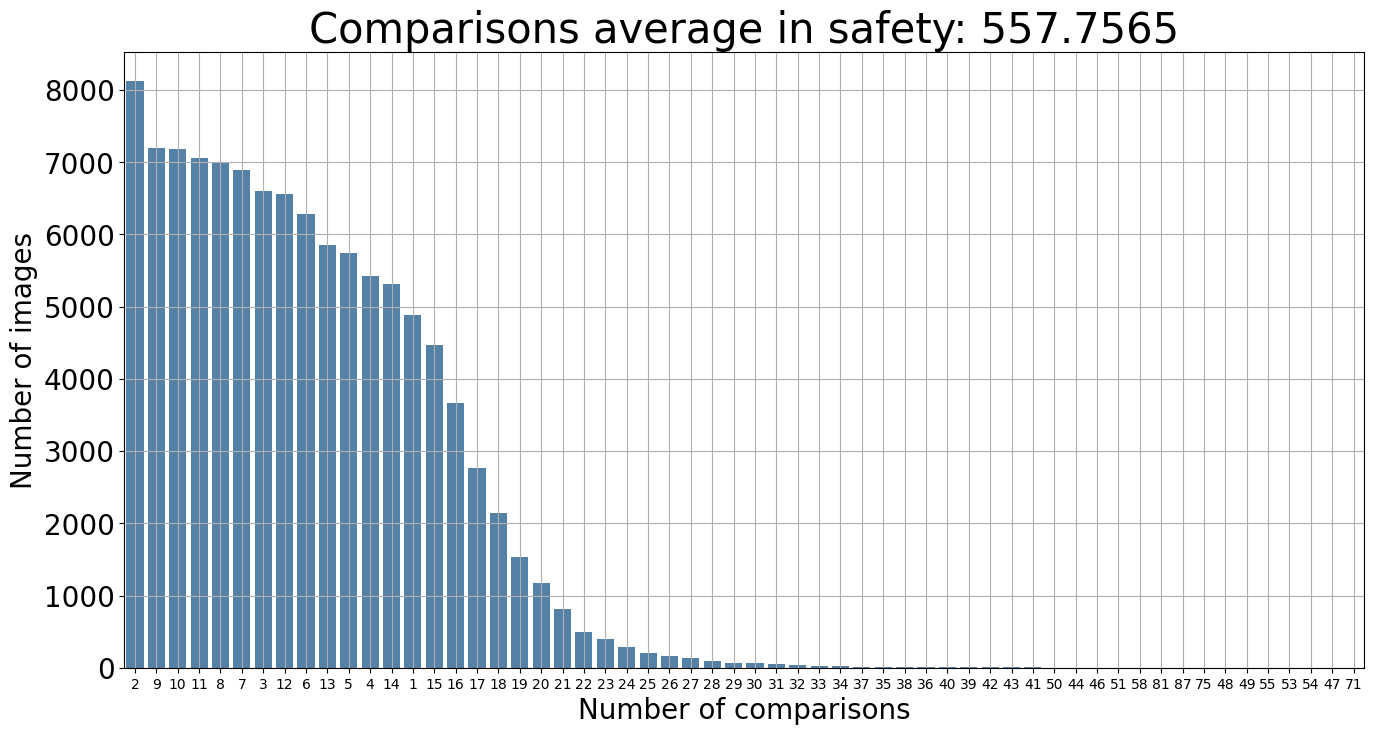

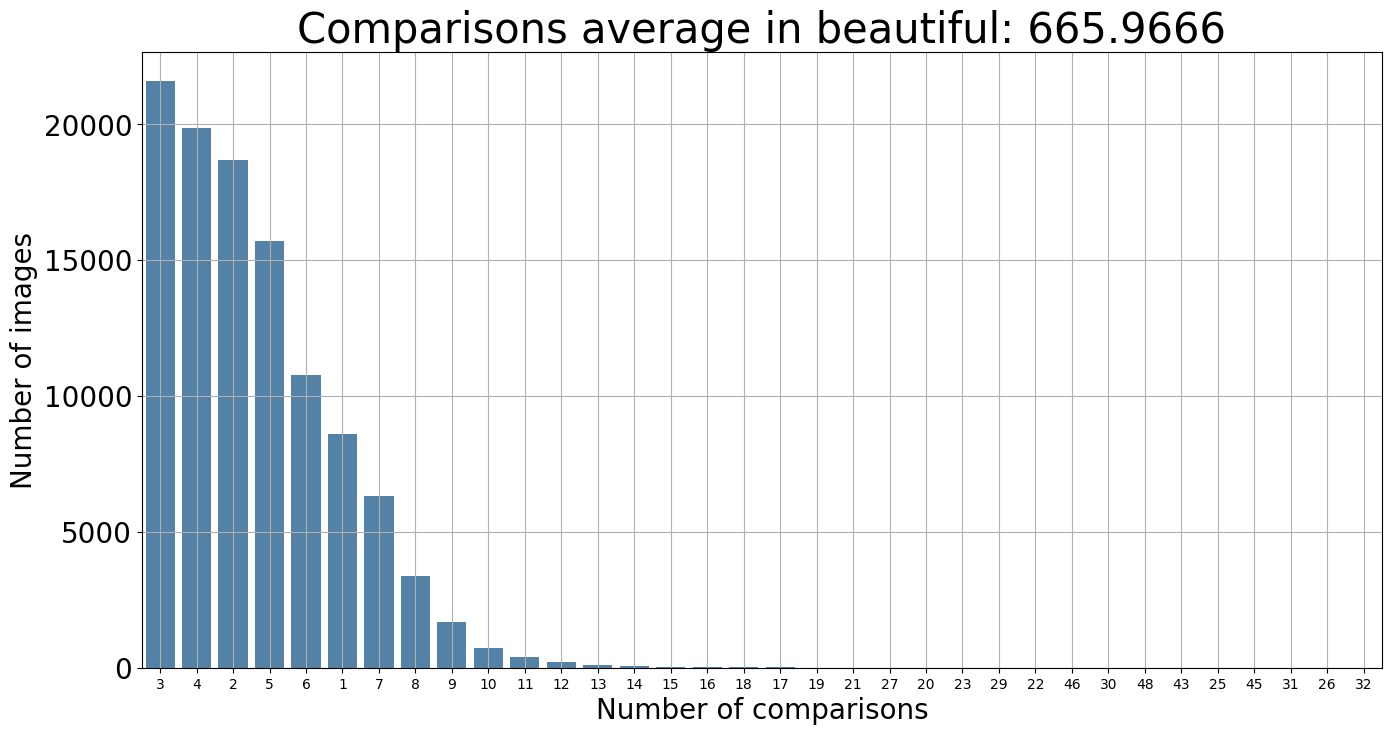

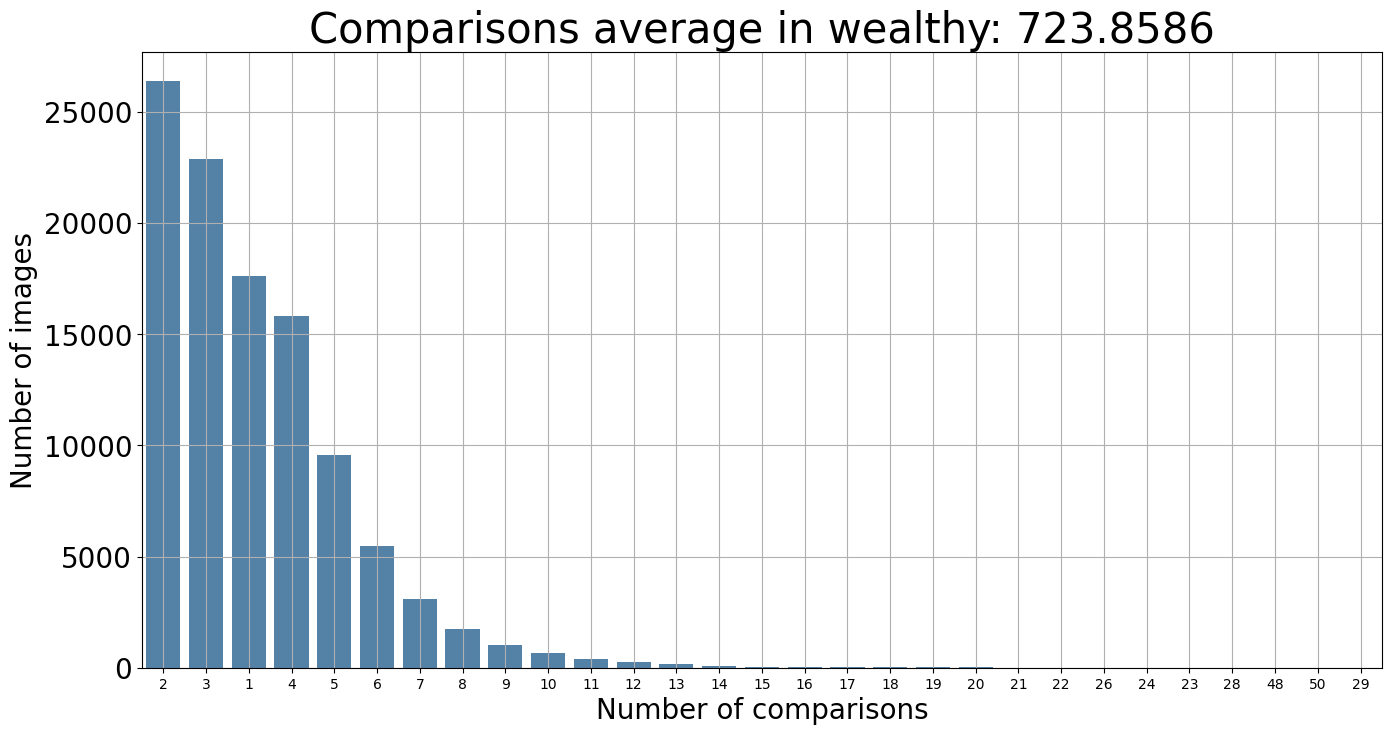

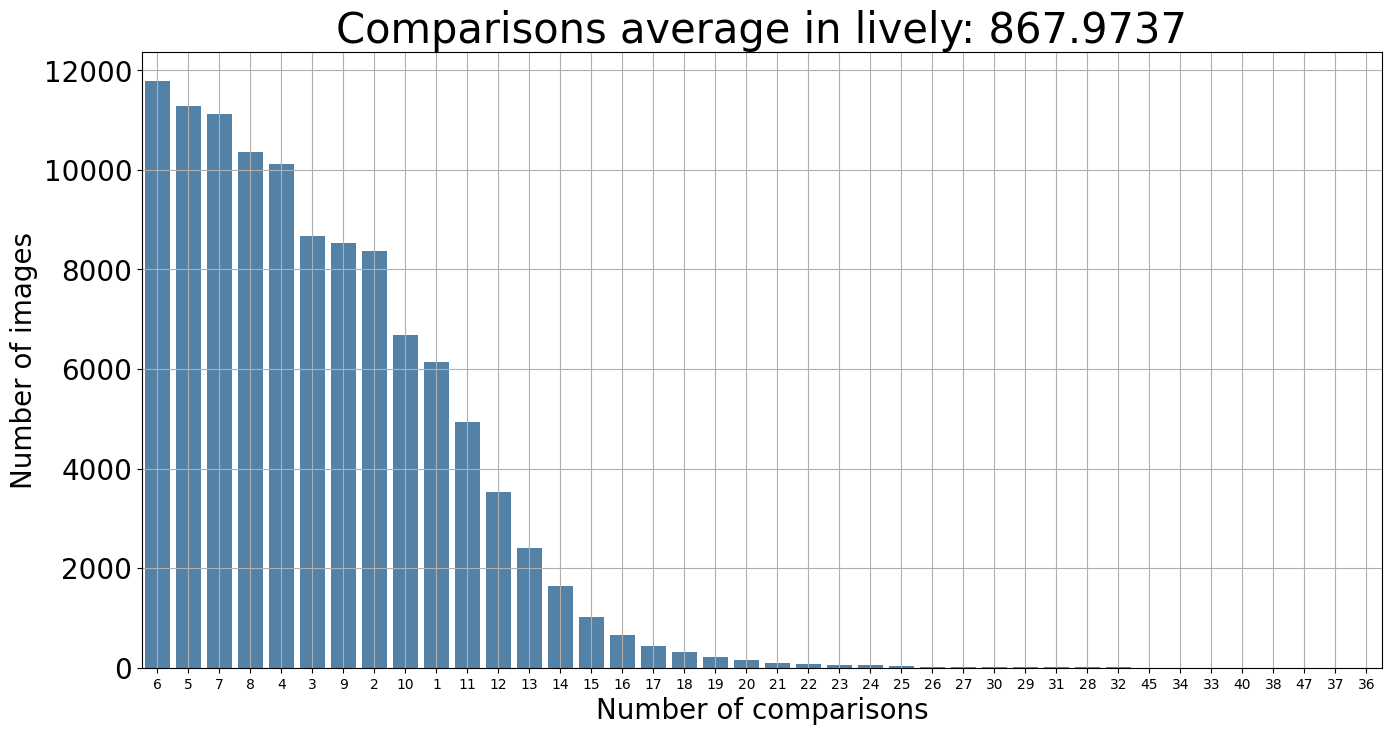

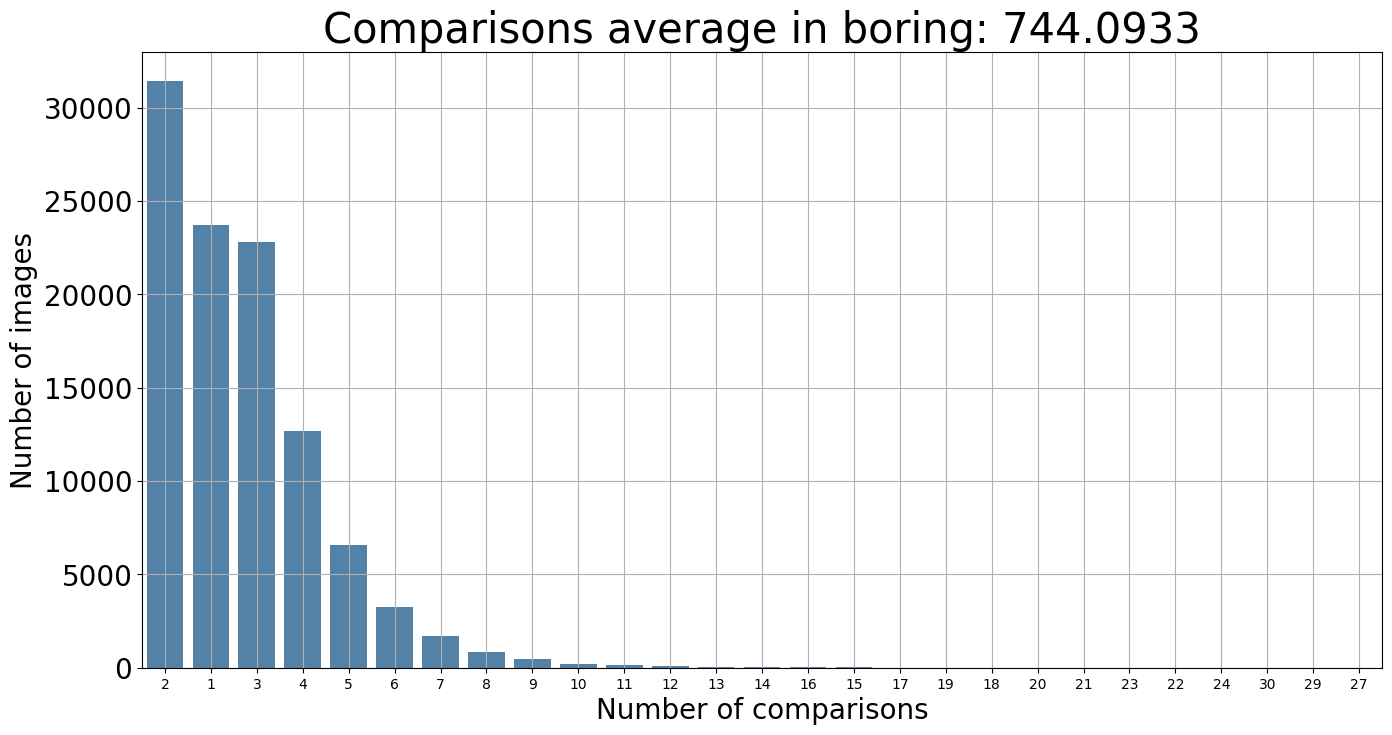

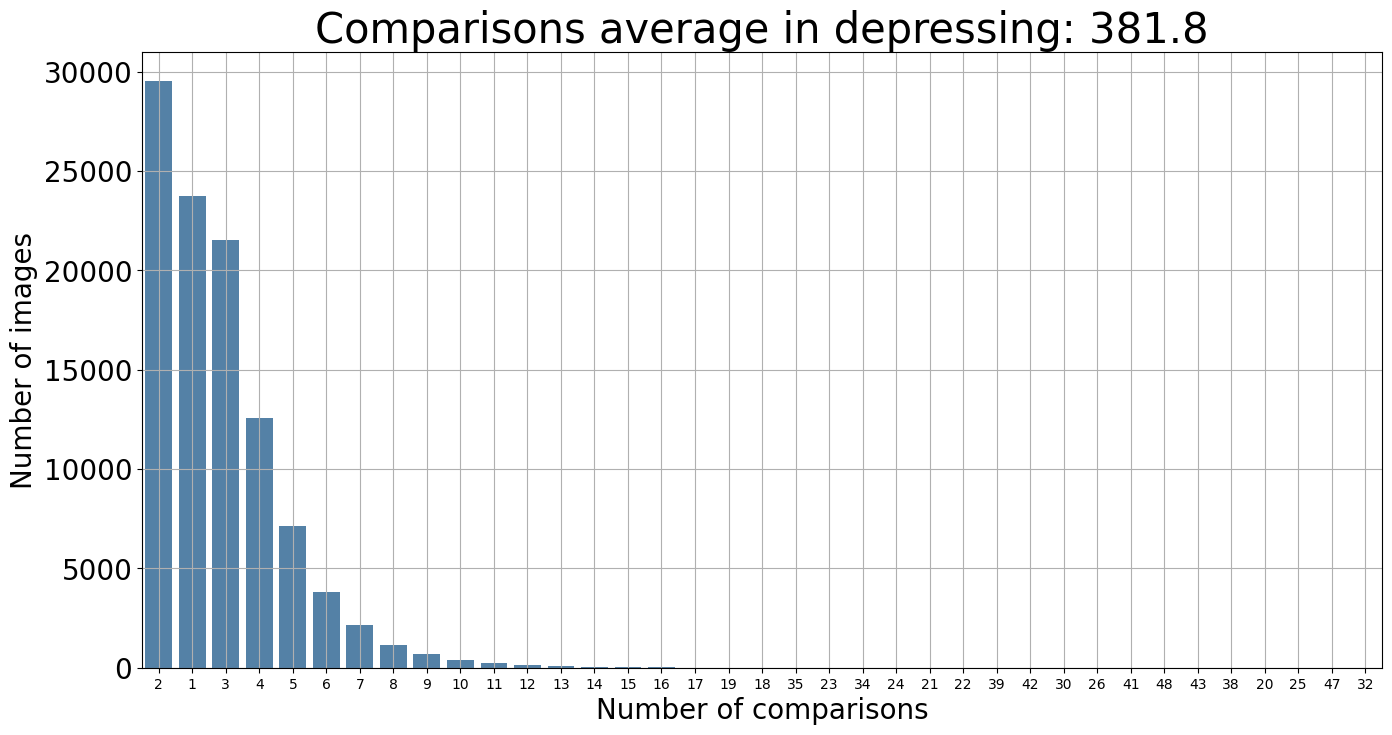

In [22]:
for metric in metrics:
    verifyDir(f"{PROCESSED_IMAGES_PATH}{metric}/")
    verifyDir(f"{PROCESSED_IMAGES_PATH}{metric}/cities/")
    
    metric_comparisons_df = pd.read_csv(f"{RESULTS_PATH}{metric}/matches.csv", sep=";", low_memory=False)
    num_comp_df = metric_comparisons_df["total_games"].value_counts().reset_index()
    
    avg_comparison =np.sum(num_comp_df["count"].values*num_comp_df["total_games"].values)/np.sum(num_comp_df["total_games"].values)
    
    #fig = num_comp_df.plot(kind="bar",figsize=(16,8)).get_figure()

    fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

    sns_fig = sns.barplot(
            data=num_comp_df,
            x=num_comp_df.columns[0],
            y=num_comp_df.columns[1],
            ax=ax,
            color="steelblue",
            order=num_comp_df.sort_values(num_comp_df.columns[1], ascending=False)[num_comp_df.columns[0]]
           )

    sns_fig.set_title(f"Comparisons average in {metric}: {round(avg_comparison,4)}", fontsize=30)
    sns_fig.set_ylabel(f"Number of images", fontsize=20)
    sns_fig.set_xlabel('Number of comparisons', fontsize=20)
    
    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='x', rotation=0, labelsize=10)
    
    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='y', labelsize=20)
    
    # add annotation
    #_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)
    
    # add a space on y for the annotations
    #sns_fig.margins(x=0.1)
    ax.grid(True)
    fig.savefig(f'{PROCESSED_IMAGES_PATH}/{metric}/number_comparisons_frequency.png')
    plt.show()
    plt.close(fig)
    
    for current_city in metric_comparisons_df["city"].unique().tolist():
        
        city_df = metric_comparisons_df[metric_comparisons_df["city"]==current_city].copy()
        num_comp_df = city_df["total_games"].value_counts().reset_index()

        avg_comparison =np.sum(num_comp_df["count"].values*num_comp_df["total_games"].values)/np.sum(num_comp_df["total_games"].values)


        fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

        sns_fig = sns.barplot(
                data=num_comp_df,
                x=num_comp_df.columns[0],
                y=num_comp_df.columns[1],
                ax=ax,
                color="steelblue",
                order=num_comp_df.sort_values(num_comp_df.columns[1], ascending=False)[num_comp_df.columns[0]]
               )

        sns_fig.set_title(f"Comparisons average in {current_city} - {metric}: {round(avg_comparison,4)}", fontsize=30)
        sns_fig.set_ylabel(f"Number of images", fontsize=20)
        sns_fig.set_xlabel('Number of comparisons', fontsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='x', rotation=0, labelsize=10)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='y', labelsize=20)

        # add annotation
        #_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

        # add a space on y for the annotations
        #sns_fig.margins(x=0.1)
        ax.grid(True)
        fig.savefig(f'{PROCESSED_IMAGES_PATH}/{metric}/cities/{current_city}_number_comparisons_frequency.png')
        #plt.show()
        plt.close(fig)